<a href="https://colab.research.google.com/github/felipepizzinato/gs-ia-2tdsph/blob/main/ml_gs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv("/content/dataset_desafiador_1000_amostras.csv")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   DH_Mortos                                1000 non-null   float64
 1   DH_Desabrigados                          1000 non-null   float64
 2   DH_Desalojados                           1000 non-null   float64
 3   DM_Unidades Habitacionais Destruídas     1000 non-null   float64
 4   DM_Instalações públicas de saúde Valor   1000 non-null   float64
 5   DM_Instalações públicas de ensino Valor  1000 non-null   float64
 6   pontuacao                                1000 non-null   int64  
 7   prioridade                               1000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 62.6+ KB


In [21]:
df.head(15)

,DH_Mortos,DH_Desabrigados,DH_Desalojados,DM_Unidades Habitacionais Destruídas,DM_Instalações públicas de saúde Valor,DM_Instalações públicas de ensino Valor,pontuacao,prioridade
0,1.808411,1177.285046,2476.018973,16.176440,239618.710704,679607.657724,9,Alta
1,1.629646,1351.815712,2302.199533,19.004695,528954.287918,386760.018567,10,Alta
2,3.918874,930.362312,2227.399125,26.751377,212662.357061,796420.679860,9,Alta
3,3.306319,1252.929672,1938.537507,27.209047,615560.094457,352265.166092,10,Alta
4,4.301234,598.414683,2924.350468,20.525809,578736.696828,272548.983773,9,Alta
5,1.199982,574.505917,1404.316201,15.078648,327715.354200,258686.739742,9,Alta
6,2.655874,966.157026,2711.285324,12.816869,504755.897017,636915.184154,10,Alta
7,0.429644,633.628735,3135.944362,18.736244,720027.376827,450064.582592,9,Alta
8,5.464687,1005.656993,1840.313841,17.516778,652966.347994,874727.840096,9,Media
9,3.166282,745.384388,1084.900652,17.591443,454693.941286,443429.110807,9,Alta


In [22]:
print(df["prioridade"].value_counts())

prioridade
Baixa    359
Media    351
Alta     290
Name: count, dtype: int64


In [23]:
df.columns

Index(['DH_Mortos', 'DH_Desabrigados', 'DH_Desalojados',
       'DM_Unidades Habitacionais Destruídas',
       'DM_Instalações públicas de saúde Valor',
       'DM_Instalações públicas de ensino Valor', 'pontuacao', 'prioridade'],
      dtype='object')

In [24]:
from sklearn.preprocessing import StandardScaler

colunas_numericas = ['DH_Mortos', 'DH_Desabrigados', 'DH_Desalojados', 'DM_Unidades Habitacionais Destruídas', 'DM_Instalações públicas de saúde Valor', 'DM_Instalações públicas de ensino Valor']
cols = df[colunas_numericas]

scaler_standard = StandardScaler()

scaled_data = scaler_standard.fit_transform(cols)

In [25]:
print(scaled_data)

[[ 0.31587658  1.84348086  1.90703043  0.63413365  0.15634291  2.11107217]
 [ 0.20211803  2.25930522  1.70347905  0.96635883  1.46710193  0.81710186]
 [ 1.65888462  1.25518031  1.61588397  1.87633446  0.03422422  2.62721968]
 ...
 [-0.83491857 -0.74816938 -0.87213434 -0.73077881 -0.91048656 -0.72729171]
 [-0.83491857 -0.87246433 -0.99251342 -1.00080619 -0.89064741 -0.88957791]
 [-0.83491857 -0.79022101 -0.99251342 -0.93661801 -0.9066009  -0.89182767]]


In [26]:
entradas = scaled_data  # Agora sim, usa os dados normalizados!
classes = df['prioridade']
print(f"Formato das tabelas de dados {entradas.shape} e classes {classes.shape}")

Formato das tabelas de dados (1000, 6) e classes (1000,)


In [27]:
from sklearn.model_selection import train_test_split

entradas_treino, entradas_teste, classes_treino, classes_teste = train_test_split(entradas, classes, test_size=0.2)

print(f"Formato das tabelas de dados de treino {entradas_treino.shape} e teste {entradas_teste.shape}")

Formato das tabelas de dados de treino (800, 6) e teste (200, 6)


In [28]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(entradas_treino, classes_treino)


RandomForestClassifier(random_state=42)

In [29]:
## Insira seu código aqui
from sklearn.metrics import accuracy_score


classes_encontradas_train = modelo_rf.predict(entradas_treino)
print("Acerto médio de classificação treino: ",accuracy_score(classes_encontradas_train, classes_treino))

classes_encontradas = modelo_rf.predict(entradas_teste)
print("Acerto médio de classificação teste: ",accuracy_score(classes_encontradas, classes_teste))


Acerto médio de classificação treino:  1.0
Acerto médio de classificação teste:  0.9


In [30]:
## Insira seu código aqui
from sklearn.metrics import classification_report

print(classification_report(classes_encontradas, classes_teste))

              precision    recall  f1-score   support

        Alta       0.93      0.84      0.88        63
       Baixa       0.84      0.97      0.90        66
       Media       0.94      0.89      0.91        71

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



In [31]:
# Lista com os nomes corretos das features, na ordem usada no modelo
features = [
    'DH_Mortos',
    'DH_Desabrigados',
    'DH_Desalojados',
    'DM_Unidades Habitacionais Destruídas',
    'DM_Instalações públicas de saúde Valor',
    'DM_Instalações públicas de ensino Valor'
]

# 🔍 Função para testar entrada manual
def testar_manual(dados: dict):
    # Garante que os dados estejam na mesma ordem das features
    df_manual = pd.DataFrame([dados], columns=features)

    # Normaliza com o MESMO scaler já ajustado com os dados de treino
    df_manual_scaled = scaler_standard.transform(df_manual)

    # Faz a predição
    pred = modelo_rf.predict(df_manual_scaled)

    # Exibe resultado
    print("Dados normalizados:")
    print(df_manual_scaled)
    print("Prioridade prevista:", pred[0])


In [32]:
entrada = {
    'DH_Mortos': 0,
    'DH_Desabrigados': 5,
    'DH_Desalojados': 10,
    'DM_Unidades Habitacionais Destruídas': 0,
    'DM_Instalações públicas de saúde Valor': 0,
    'DM_Instalações públicas de ensino Valor': 0
}


testar_manual(entrada)


Dados normalizados:
[[-0.83491857 -0.94952215 -0.98080292 -1.26605612 -0.92918687 -0.89182767]]
Prioridade prevista: Baixa


In [33]:
entrada = {
    'DH_Mortos': 25,
    'DH_Desabrigados': 2000,
    'DH_Desalojados': 3500,
    'DM_Unidades Habitacionais Destruídas': 90,
    'DM_Instalações públicas de saúde Valor': 400000,
    'DM_Instalações públicas de ensino Valor': 500000
}
testar_manual(entrada)


Dados normalizados:
[[15.07400637  3.80362302  3.10616417  9.30592867  0.88290832  1.31746162]]
Prioridade prevista: Alta


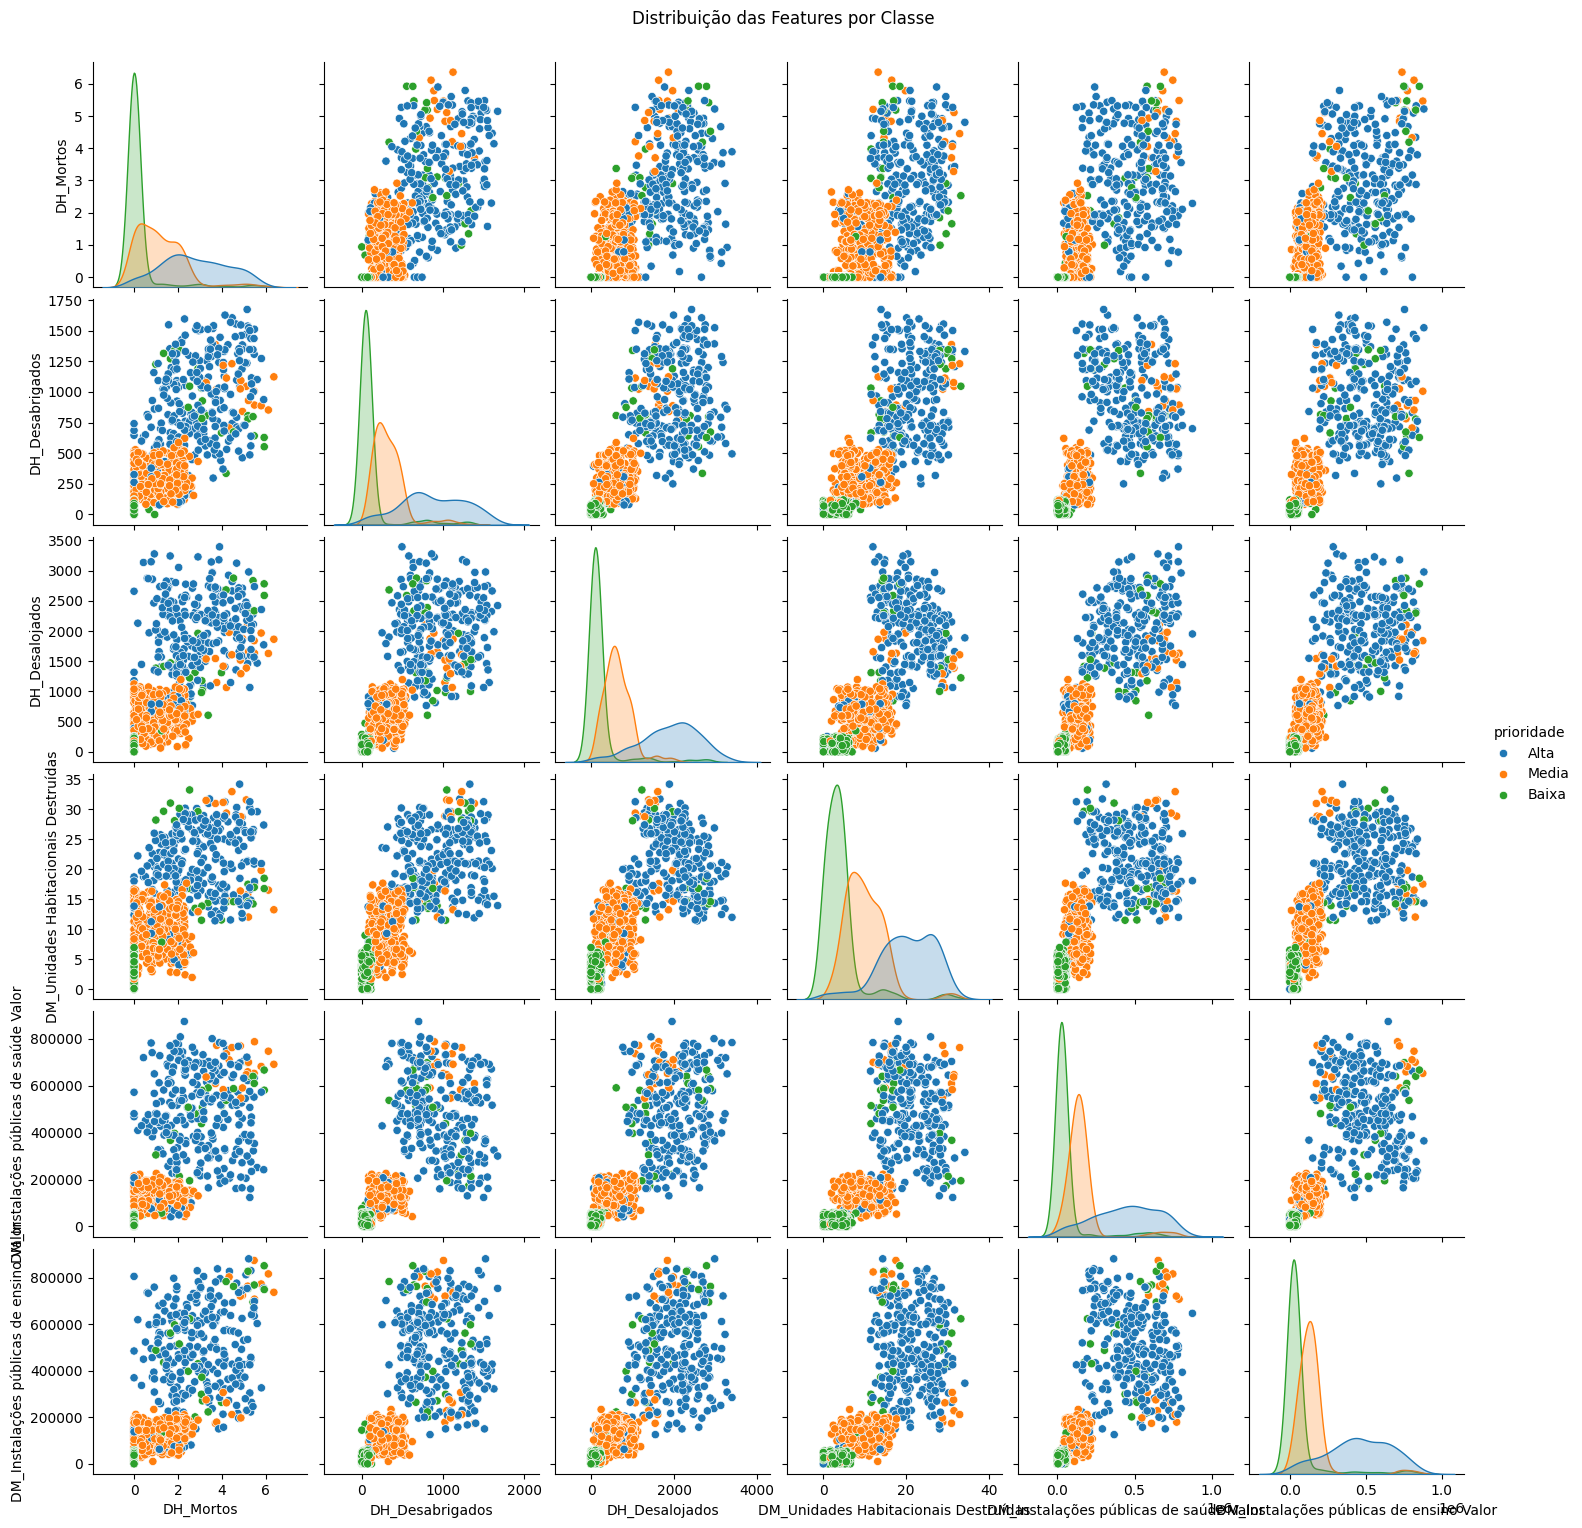

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

df_plot = df.copy()
df_plot['prioridade'] = df_plot['prioridade'].astype(str)  # Para evitar erro no gráfico

sns.pairplot(df_plot[[
    'DH_Mortos',
    'DH_Desabrigados',
    'DH_Desalojados',
    'DM_Unidades Habitacionais Destruídas',
    'DM_Instalações públicas de saúde Valor',
    'DM_Instalações públicas de ensino Valor',
    'prioridade'
]], hue='prioridade', diag_kind='kde')

plt.suptitle("Distribuição das Features por Classe", y=1.02)
plt.show()
